In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

In [2]:
#http://blog.ayoungprogrammer.com/2013/04/tutorial-detecting-multiple-rectangles.html/
img_dir = [y for x in os.walk('D:/DH/NetData/Set3') for y in glob(os.path.join(x[0], '*.png'))]

In [12]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
img_idx = 100
img = cv2.imread(img_dir[img_idx])


# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
thresh_not = cv2.bitwise_not(thresh)

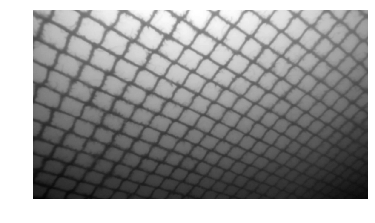

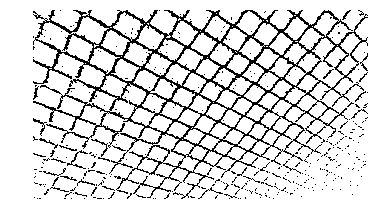

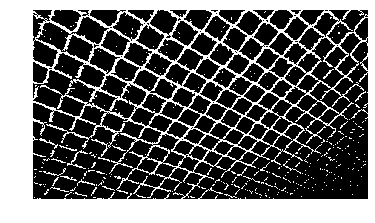

In [13]:
plt.axis("off")
plt.imshow(blurred, cmap='gray')
plt.show()

plt.axis("off")
plt.imshow(thresh, cmap='gray')
plt.show()

plt.axis("off")
plt.imshow(thresh_not, cmap='gray')
plt.show()

In [22]:
def lineEq(points, imwidth, imheight):
    x1 = points[0]
    y1 = points[1]
    x2 = points[2]
    y2 = points[3]
    
    if x2 == x1:
        x0 = x1
        y0 = 0
        xe = x1
        ye = imheight
        
    elif y2 == y1:
        x0 = 0
        y0 = y1
        xe = imwidth
        ye = y1
        
    else:
        m = (y2 - y1)/(x2 - x1)

        x0 = 0
        y0 = int(m * (x0 - x1) + y1)
        xe = imwidth
        ye = int(m * (xe - x1) + y1)
        
    return [x0, y0, xe, ye]

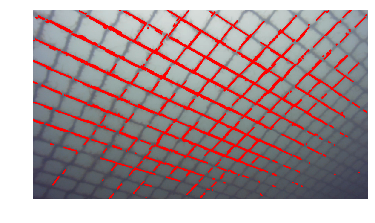

In [29]:
linesP = cv2.HoughLinesP(thresh_not, 1, np.pi/180, 400, 500, 1)
img_show = img.copy()
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        #l = lineEq(linesP[i][0], img.shape[1], img.shape[0])
        
        cv2.line(img_show, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3,
                cv2.LINE_AA)
        
plt.axis("off")
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
print(linesP.shape)

(754, 1, 4)
